In [8]:

import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for easier manipulation and understanding
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = y

# Display basic info and the first few rows
print("Data Info:")
print(iris_df.info())
print("\nFirst 5 rows:")
print(iris_df.head())

# Check for missing values
if iris_df.isnull().sum().sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nMissing values detected, further investigation and handling needed.")

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures have been scaled.")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15280\675766099.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   s

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Testing different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    models[kernel] = model
    print(f"\nModel trained using {kernel} kernel.")


Model trained using linear kernel.

Model trained using poly kernel.

Model trained using rbf kernel.


In [10]:


from sklearn.model_selection import cross_val_score

# Perform K-fold cross-validation
k_folds = 5
for kernel, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=k_folds)
    print(f"Average CV score for {kernel} kernel: {cv_scores.mean():.2f}")

Average CV score for linear kernel: 0.97
Average CV score for poly kernel: 0.93
Average CV score for rbf kernel: 0.97


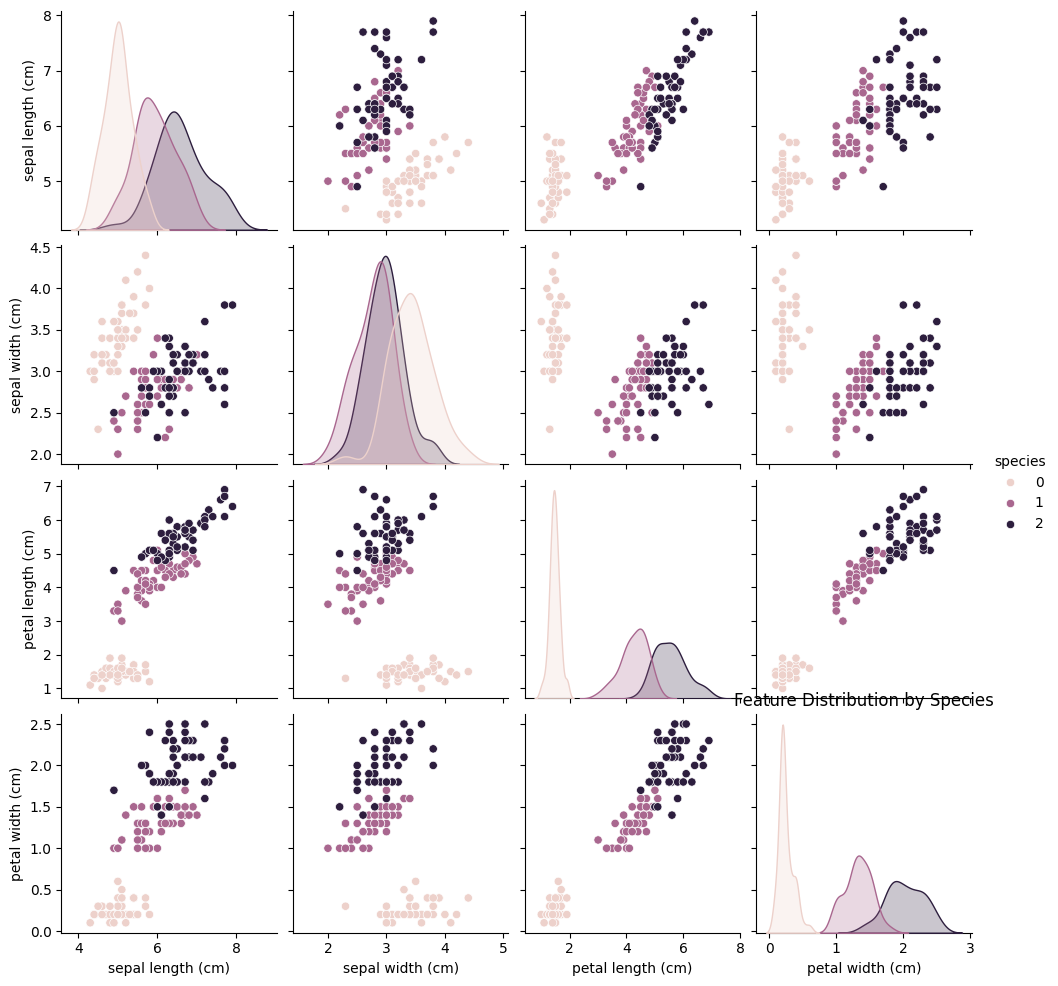

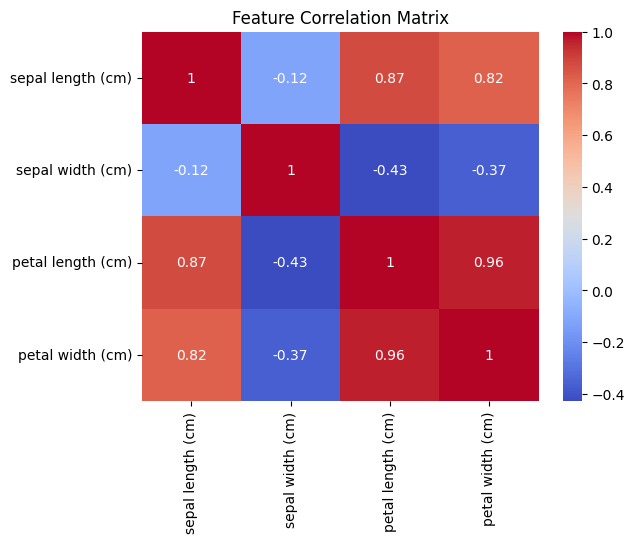

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for feature distribution
sns.pairplot(iris_df, hue='species', vars=feature_names)
plt.title("Feature Distribution by Species")
plt.show()

# Correlation matrix
corr_matrix = iris_df.drop('species', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()